In [2]:
%pip install sqlalchemy pandas python-dotenv pymysql pyarrow matplotlib
import pandas as pd
import pymysql.cursors
from getpass import getpass
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.9 MB/s eta 0:00:00


In [18]:
def connect_to_db():
    ### Load credentials
    # .env file path
    env_path = os.path.join("env", "credentials.env")
    # Load .env file
    load_dotenv(dotenv_path=env_path)


    try:
        return pymysql.connect(
        #host = os.getenv("DB_HOST"),
        #user = os.getenv("DB_USER"),
        #password = os.getenv("DB_PASSWORD"),
        #database =os.getenv("DB_NAME")

        host=input("host: "),
        user=input("Username: "),
        password=getpass("Password: "),
        database ="situation",
                    )
    except pymysql.Error as e:
        print(e)

def get_table():
    db_conn= connect_to_db()

    select_table_qry="SELECT * FROM k11_reaction_kinetics LIMIT 100"

    if not(type(db_conn) == str):
      with db_conn:
        with db_conn.cursor() as cursor:
            cursor.execute(select_table_qry)
            result= cursor.fetchall()
        return result
    else:
        return[]



def save_data(df):
    # Save path for CSV and parquet files
    save_path_parquet = "kinetics_rate_data.parquet"
    save_path_csv = "kinetics_rate_data.csv"
    df.to_parquet(save_path_parquet)
    print(f"Data (Parquet) successfully saved in '{save_path_parquet}'")
    df.to_csv(save_path_csv, index=False)
    print(f"Data (CSV) successfully saved in '{save_path_csv}'")

In [27]:
df=pd.DataFrame(get_table())
df.rename(columns={0: 'exp_id', 1: 'time',2: 'temperature',3: 'concentration',4: 'reaction_rate'}, inplace=True)
print(df)
#save_data(df)

host: den1.mysql6.gear.host
Username: situation
Password: ··········
    exp_id  time  temperature  concentration  reaction_rate
0        1   0.0         25.0       1.000000       0.050000
1        1   2.0         25.0       0.904837       0.045242
2        1   4.0         25.0       0.818731       0.040937
3        1   6.0         25.0       0.740818       0.037041
4        1   8.0         25.0       0.670320       0.033516
5        1  10.0         25.0       0.606531       0.030327
6        1  12.0         25.0       0.548812       0.027441
7        1  14.0         25.0       0.496585       0.024829
8        1  16.0         25.0       0.449329       0.022466
9        1  18.0         25.0       0.406570       0.020329
10       1  20.0         25.0       0.367879       0.018394
11       1  22.0         25.0       0.332871       0.016644
12       1  24.0         25.0       0.301194       0.015060
13       1  26.0         25.0       0.272532       0.013627
14       1  28.0         25.0  

    exp_id  time  temperature  concentration  reaction_rate
0        1   0.0         25.0       1.000000       0.050000
1        1   2.0         25.0       0.904837       0.045242
2        1   4.0         25.0       0.818731       0.040937
3        1   6.0         25.0       0.740818       0.037041
4        1   8.0         25.0       0.670320       0.033516
5        1  10.0         25.0       0.606531       0.030327
6        1  12.0         25.0       0.548812       0.027441
7        1  14.0         25.0       0.496585       0.024829
8        1  16.0         25.0       0.449329       0.022466
9        1  18.0         25.0       0.406570       0.020329
10       1  20.0         25.0       0.367879       0.018394
11       1  22.0         25.0       0.332871       0.016644
12       1  24.0         25.0       0.301194       0.015060
13       1  26.0         25.0       0.272532       0.013627
14       1  28.0         25.0       0.246597       0.012330
15       1  30.0         25.0       0.22

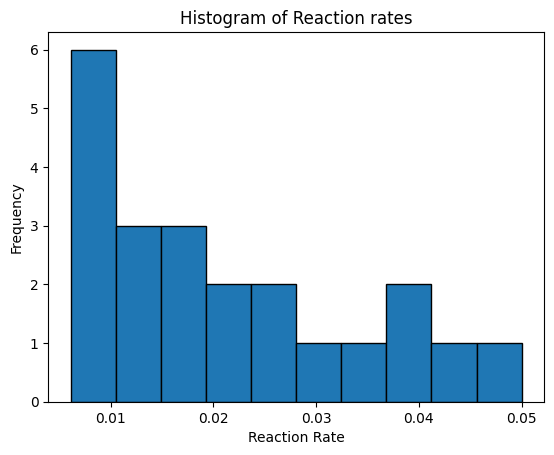

In [30]:
### Read and analyse data

#data = pd.read_parquet(save_path_parquet, engine="pyarrow")
#data.head(5)
print(df)
# Summary statistics for affinity and resolution
affinity_stats = df['reaction_rate'].describe()

# Count of classifications
classification_counts = df['exp_id'].value_counts()

print("Reation Rate: \n", affinity_stats, "\n")
print("Experiments: \n", classification_counts, "\n")

# Plotting the histogram for affinity
plt.hist(df['reaction_rate'], bins=10, edgecolor='black')
plt.title('Histogram of Reaction rates')
plt.xlabel('Reaction Rate')
plt.ylabel('Frequency')
plt.show()